In [6]:
import numpy as np
import pygad
import tree_representation
import csv
import matplotlib.pyplot as plt

In [11]:
xs, ys, target = None, None, None

In [12]:
def fitness_func(ga_instance, solution, solution_idx):
  tree = tree_representation.fromIntArray(solution)
  fit = tree_representation.fitness(tree, xs, ys)
  return fit

def crossover_func(parents, offspring_size, ga_instance):
  offspring = []
  t1, t2 = tree_representation.fromIntArray(parents[0]), tree_representation.fromIntArray(parents[1])
  
  while len(offspring) != offspring_size[0]:
    child, _ = tree_representation.crossover_tree(t1, t2)

    try:
      offspring.append(tree_representation.toIntArray(child))
    except IndexError:
      print("Not crossovering")
    
  return np.array(offspring)

def mutation_func(offspring, ga_instance):
  new_offspring = []

  for t_numerical in offspring:
    t = tree_representation.fromIntArray(t_numerical)
    
    if (np.random.rand() < ga_instance.mutation_probability):
      t = tree_representation.mutate_tree(t)
    new_offspring.append(tree_representation.toIntArray(t))

  return np.array(new_offspring)

In [14]:
def predict_function():
    initial_population = [tree_representation.toIntArray(tree_representation.generate_random_tree()) for _ in range(5000)]

    ga_instance = pygad.GA(num_generations=10,
                        num_parents_mating=2,
                        initial_population=initial_population,
                        fitness_func=fitness_func,
                        keep_elitism=10,
                        crossover_type=crossover_func,
                        mutation_type=mutation_func,
                        gene_type=np.int8,
                        mutation_probability=1,
                        )

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print("Target: ", target)
    print("Best solution", tree_representation.fromIntArray(solution))
    print("Best fitness", solution_fitness)


    plt.plot(xs, ys, color='green')
    plt.plot(xs, [tree_representation.fromIntArray(solution).evaluate(x) for x in xs], color='blue')
    # print(xs)
    # print(tree_representation.fromIntArray(solution).evaluate(xs))
    ga_instance.plot_fitness()

/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:51: RuntimeWarning: invalid value encountered in scalar power
  return self.left_child.evaluate(x) ** self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:87: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.child.evaluate(x))
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:51: RuntimeWarning: invalid value encountered in power
  return self.left_child.evaluate(x) ** self.right_child.evaluate(x)
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:263: RuntimeWarning: overflow encountered in square
  fitness = -np.sum(np.square(ys - tree.evaluate(xs)))
/Users/galgantar/Documents/Code/Inteligentni-sistemi/seminarska 1/tree_representation.py:85: RuntimeWarning: invalid value encountered in log
  return np.log(self.child.evaluate(x))
/User

Target:   -4*x**5 + 3*x**4 + -4*x**2 + -2*x + 5
Best solution + ^ min neg abs - 8.00 neg 4.00 -9.00 9.00 * ^ 7.00 10.00 -5.00
Best fitness -1.0647576341368243e+22


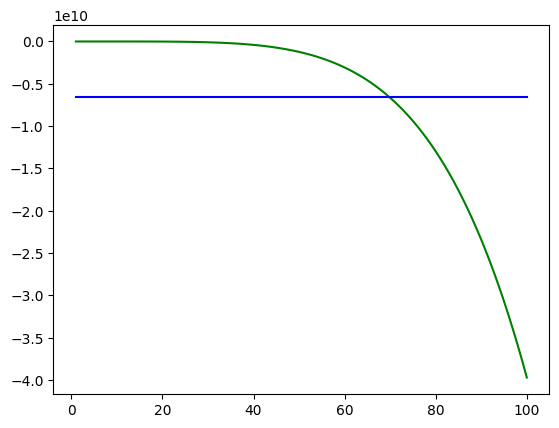

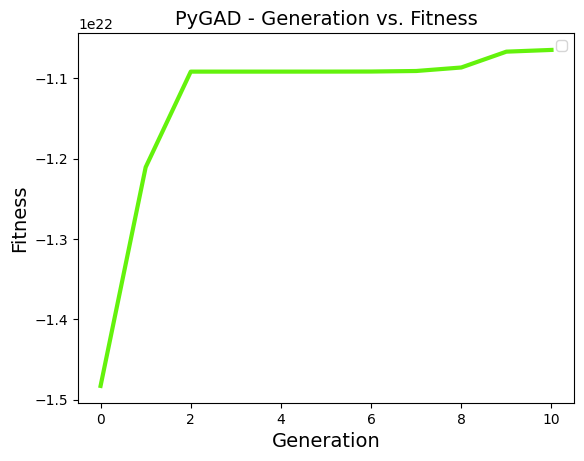

In [15]:
equation_index = 99

with open("dataset.csv") as file:
    reader = csv.reader(file)

    d = 0
    for row in reader:
        target = row[0]
        xs = np.fromstring(row[1][1:-1], sep=", ")
        ys = np.fromstring(row[2][1:-1], sep=", ")
        if d == equation_index:
           break
        d += 1

predict_function()